# Plot and animate mode shapes with DPF {#ref_plot_and_animate_modes}

This example shows how to extract mode shapes from a modal analysis
result and how to plot and animate them.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import animation
from ansys.dpf.core import examples

# Retrieve mode shapes


In [2]:
# Load the result file as a model
model = dpf.Model(examples.download_modal_frame())
print(model)

# Extract the displacement results which define mode shapes
disp = model.results.displacement.on_all_time_freqs.eval()

DPF Model
------------------------------
Modal analysis
Unit system: NMM: mm, ton, N, s, mA, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  stress: ElementalNodal Stress 
     -  elastic_strain: ElementalNodal Strain
------------------------------
DPF  Meshed Region: 
  5886 nodes 
  2842 elements 
  Unit: mm 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 6 
Cumulative     Frequency (Hz) LoadStep       Substep         
1              253.615690     1              1               
2              317.918491     1              2               
3              329.825709     1              3               
4              575.619678     1              4               
5              621.973976     1              5               
6              667.364882     1              6               



# Plot mode shapes


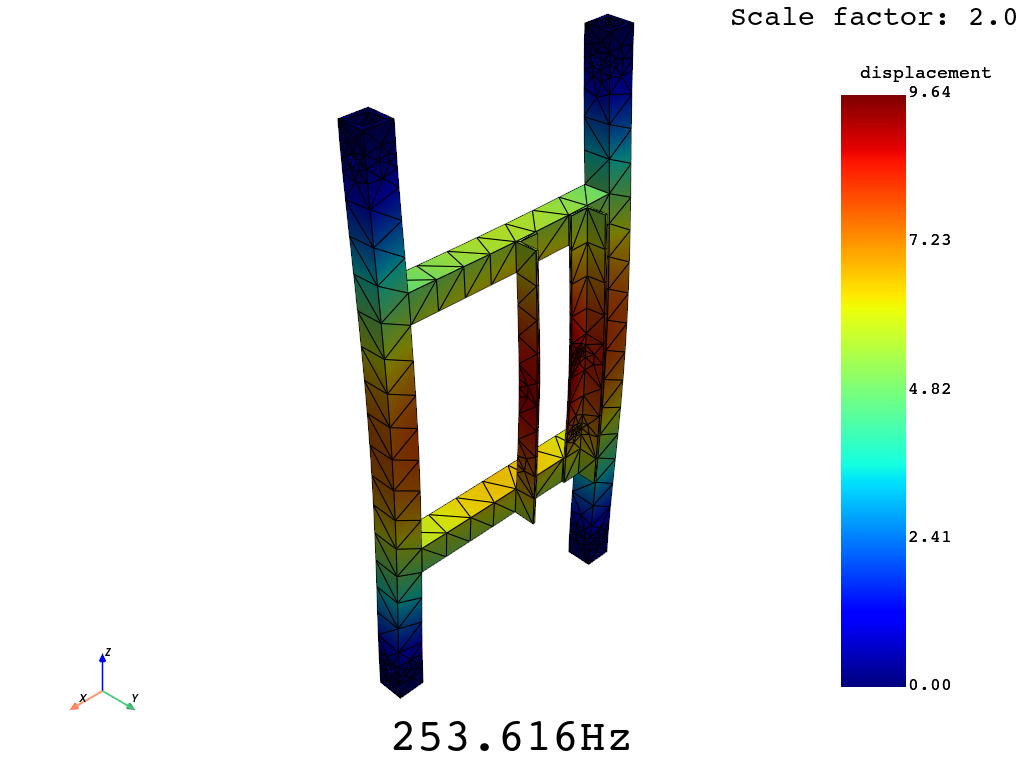

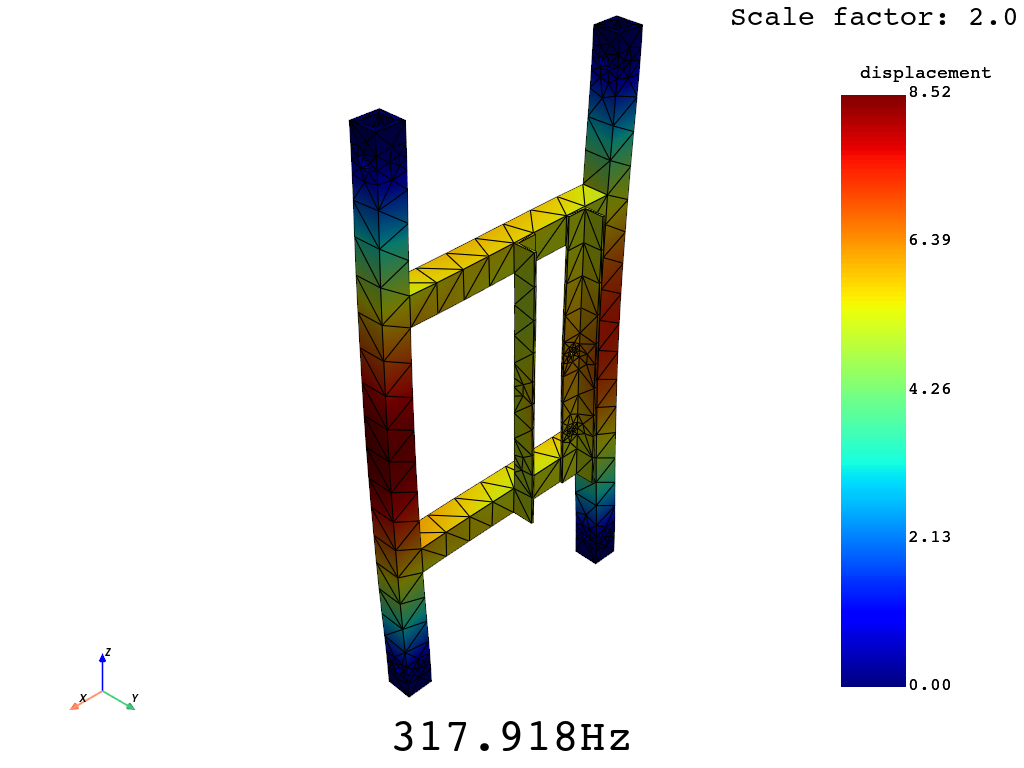

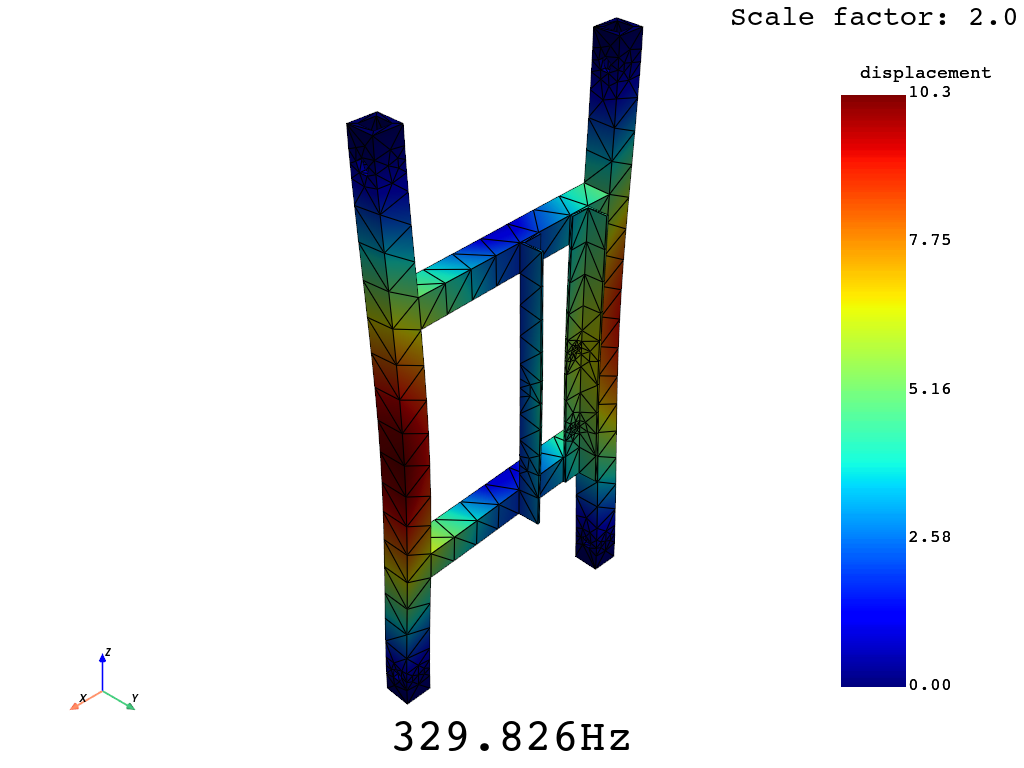

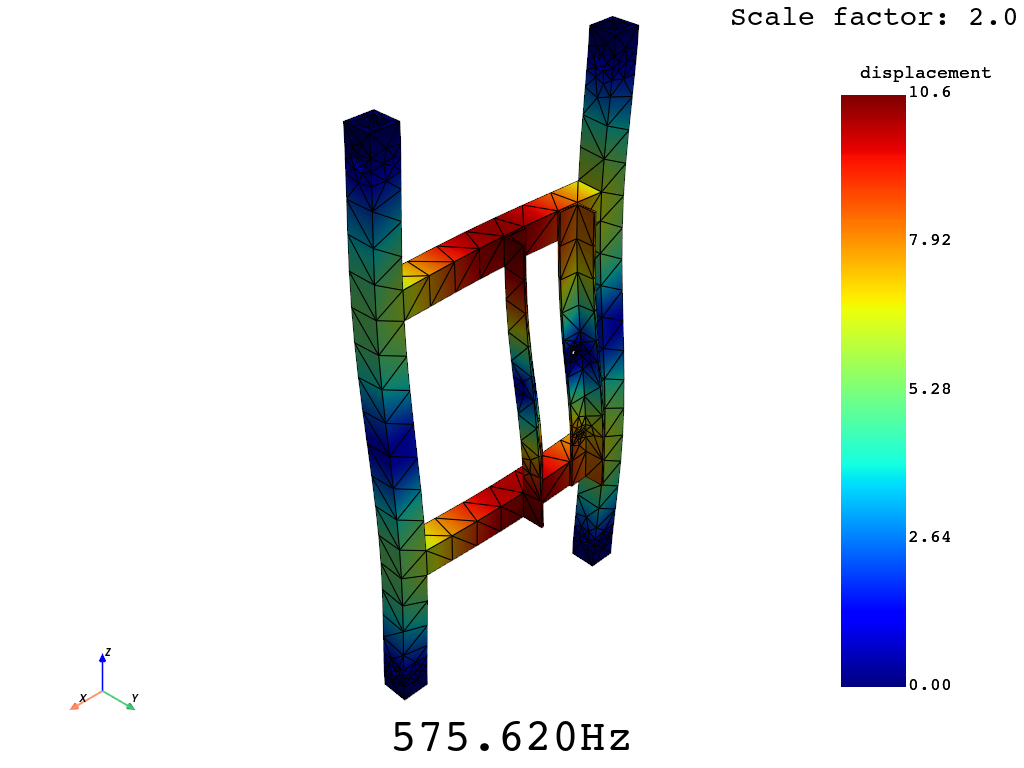

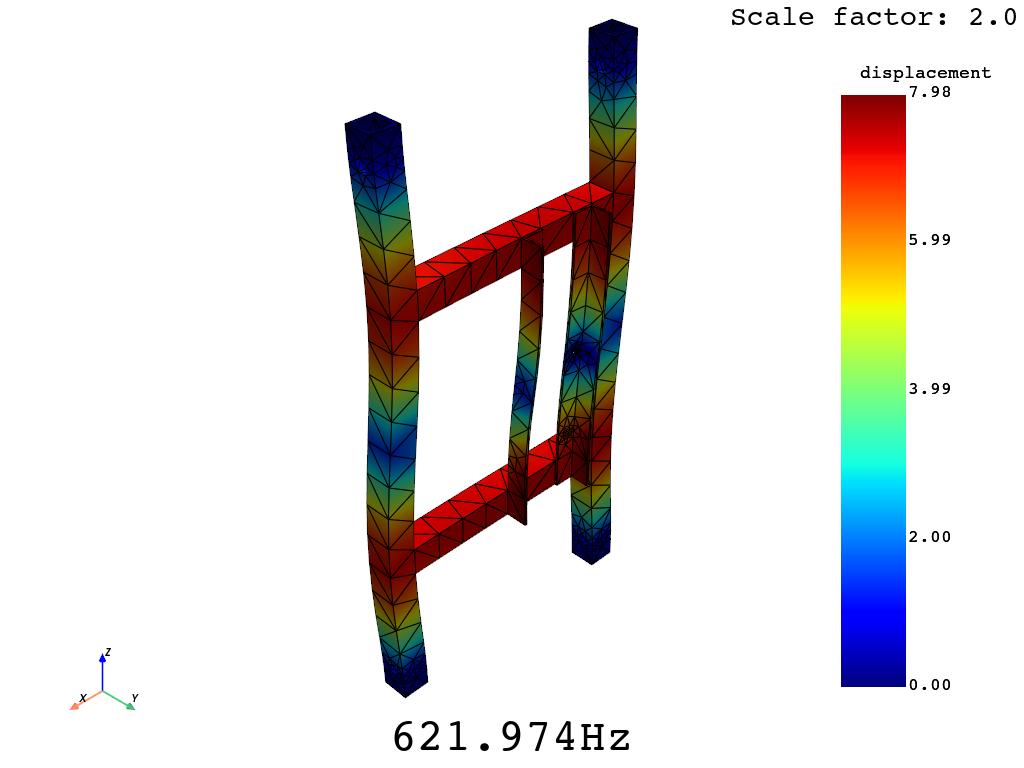

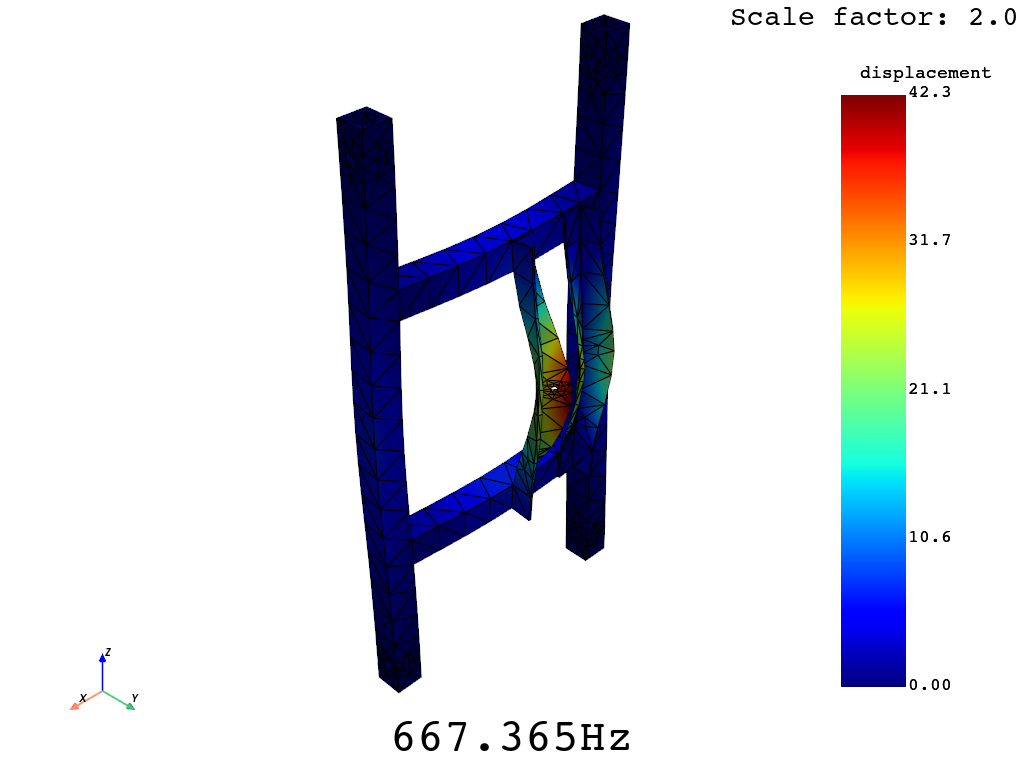

In [3]:
# Get the frequency scoping (available frequency IDs for disp)
freq_scoping = disp.get_time_scoping()
# Get the frequency support (all available frequencies in the model)
freq_support = disp.time_freq_support
# Get the unit from the time_freq_support
unit = freq_support.time_frequencies.unit

# For each ID in the scoping
for freq_set in freq_scoping:
    # Get the associated frequency in the time_freq_support
    freq = freq_support.get_frequency(cumulative_index=freq_set - 1)
    # Get the associated mode shape as a displacement field
    disp_mode = disp.get_field_by_time_complex_ids(freq_set, 0)
    # Extract the mode frequency and unit
    text = f"{freq:.3f}{unit}"
    # Plot the mode displacement field on the deformed mesh
    disp_mode.plot(deform_by=disp_mode, scale_factor=2.0, text=text)

Animate a mode shape To suppress window pop-up, set the
[off_screen]{.title-ref} argument to True.
\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~


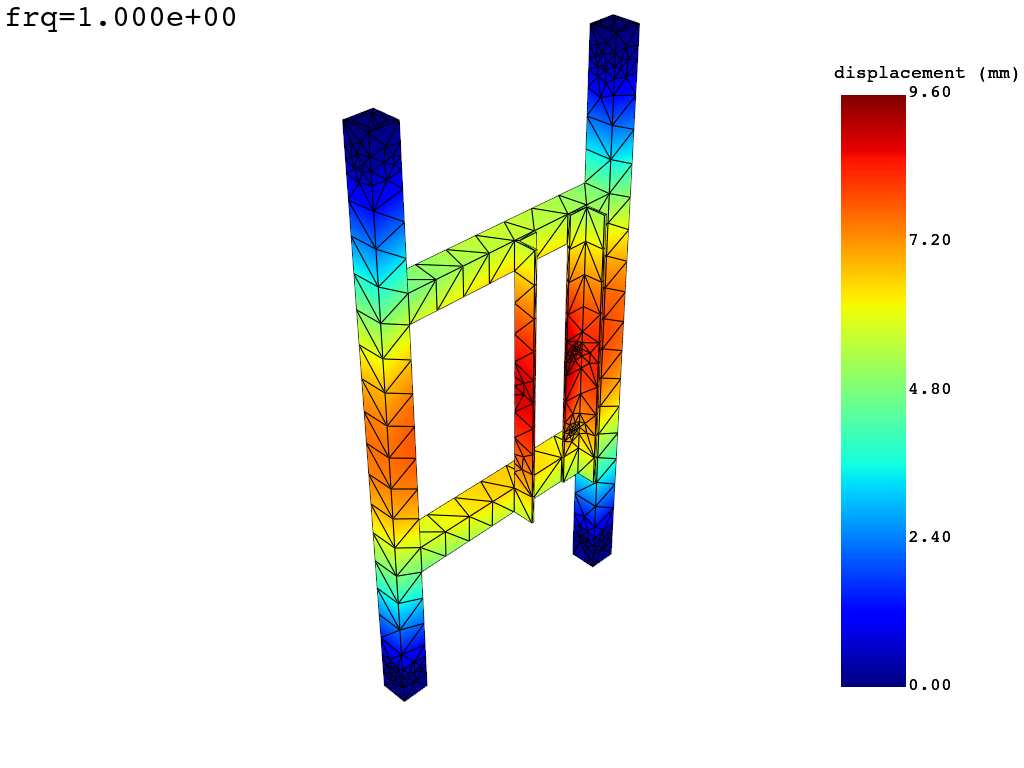

In [4]:
animation.animate_mode(disp, mode_number=1, save_as="tmp.gif", off_screen=True)